In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LFW_X_df, get_y_df, data_prep
from model_arch import build_LFW_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2024-01-12 19:25:42.935922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 19:25:42.966488: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 19:25:42.967176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-12 19:25:43.645060: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-01-12 19:25:44.841520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 19:25:44.860821: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
data_filepath = "../../../data/csv/EXP1&2DATA.csv"
checkpoint_filepath = "../../../model_weights/regression/LFW"

In [5]:
callback = create_callback(
    checkpoint_filepath
)

In [6]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

65.95774617067835

In [7]:
df.tail()

,date,plant_id,tray_id,LFW_g,LDW_g,LA_mm2,manual_height_cm,area,perimeter,width,...,G_channel,B_channel,H_channel,S_channel,V_channel,height_cm_max,height_cm_mode,e_minoraxis,e_majoraxis,e_eccentricity
452,29-Jun,24,6,16.72,1.22,250.754,7.4,9575.5,652.055911,128,...,76,38,31,135,77,6.1,5.2,114.264679,134.337616,0.525848
453,29-Jun,25,6,19.09,1.56,306.960,7.7,9380.0,550.617312,152,...,75,37,33,139,75,5.1,4.2,107.612495,142.436798,0.655137
454,29-Jun,26,6,8.79,0.81,152.214,7.5,5789.0,434.818322,85,...,77,41,36,129,77,5.1,4.6,76.064171,114.750618,0.748739
455,29-Jun,27,6,18.71,1.42,302.190,7.5,10234.0,634.700572,155,...,73,32,33,152,73,6.9,5.4,113.188011,149.977432,0.656070
456,29-Jun,28,6,12.54,1.07,197.994,6.5,7710.0,535.528999,131,...,79,40,34,136,79,6.9,5.5,91.396469,129.623932,0.709118


In [8]:
X = get_LFW_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [9]:
model = build_LFW_model()
print('Input shape:', X_train[0].shape)

Input shape: (18,)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [11]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/375


11/11 [==============================] - 1s 11ms/step - loss: 67.1801 - val_loss: 63.0977
Epoch 2/375
11/11 [==============================] - 0s 2ms/step - loss: 67.1534 - val_loss: 63.0073
Epoch 3/375
11/11 [==============================] - 0s 2ms/step - loss: 67.1266 - val_loss: 62.9224
Epoch 4/375
11/11 [==============================] - 0s 2ms/step - loss: 67.0998 - val_loss: 62.8347
Epoch 5/375
11/11 [==============================] - 0s 2ms/step - loss: 67.0729 - val_loss: 62.7648
Epoch 6/375
11/11 [==============================] - 0s 2ms/step - loss: 67.0461 - val_loss: 62.6980
Epoch 7/375
11/11 [==============================] - 0s 2ms/step - loss: 67.0192 - val_loss: 62.6388
Epoch 8/375
11/11 [==============================] - 0s 2ms/step - loss: 66.9922 - val_loss: 62.5777
Epoch 9/375
11/11 [==============================] - 0s 2ms/step - loss: 66.9652 - val_loss: 62.5191
Epoch 10/375
11/11 [==============================] - 0s 2ms/step - loss: 66.9381 - val_loss: 62.4630


KeyboardInterrupt: 

In [ ]:
model.save(checkpoint_filepath)

2024-01-06 19:17:32.916539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:32.924964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:33.068712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-01-06 19:17:33

INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW/assets


INFO:tensorflow:Assets written to: ../../../model_weights/regression/LFW/assets


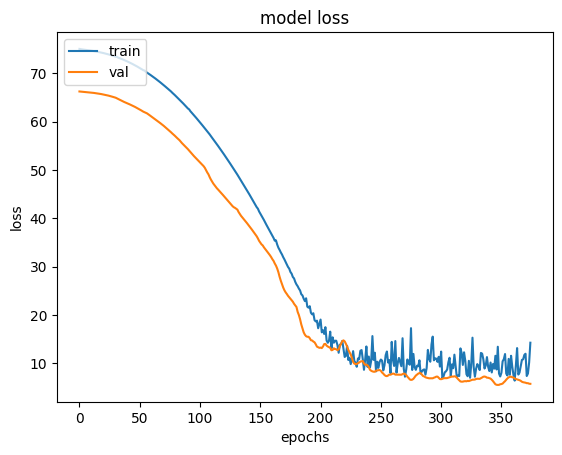

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 8.3259


8.325867652893066

In [ ]:
figures_filepath = "../../../figures/LFW_error_csv"
generate_csv(model, X_test, y_test, "LFW_predictions", "LFW_actual", figures_filepath)

1/1 [==============================] - 0s 64ms/step
